# Analyzing the Effect of COVID-19 on High School Admissions to Virginia Tech

## Overview

The COVID-19 pandemic has had far-reaching effects across various sectors, including education. One significant area of impact is university admissions, where shifting policies and economic uncertainties have changed the patterns of student applications, acceptances, and enrollments. In this analysis, we explore how the pandemic influenced high school admissions to Virginia Tech, focusing on the periods before and after the onset of COVID-19.

Using historical admissions data, this study aims to uncover trends and shifts in the number of applications, offers, and enrollments among various demographic groups. Our analysis compares pre-pandemic and post-pandemic statistics to evaluate whether the pandemic led to significant changes in admissions outcomes. Specifically, we will examine trends for different categories of students, such as gender, race, first-generation status, residency, and international students.

We will calculate the rates of change in applications, offers, and enrollments across these categories and provide insights into how the pandemic may have affected university admission strategies and student decisions.

By the end of this notebook, you will gain a deeper understanding of the pandemic's effects on Virginia Tech's high school admissions, with visualizations and data-driven analysis shedding light on key changes in these trends.

**Author: Eric Uehling**  
*Date: 5.1.23*

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


All - Pre COVID Offered Rate: 69.17%
All - Post COVID Offered Rate: 56.73%


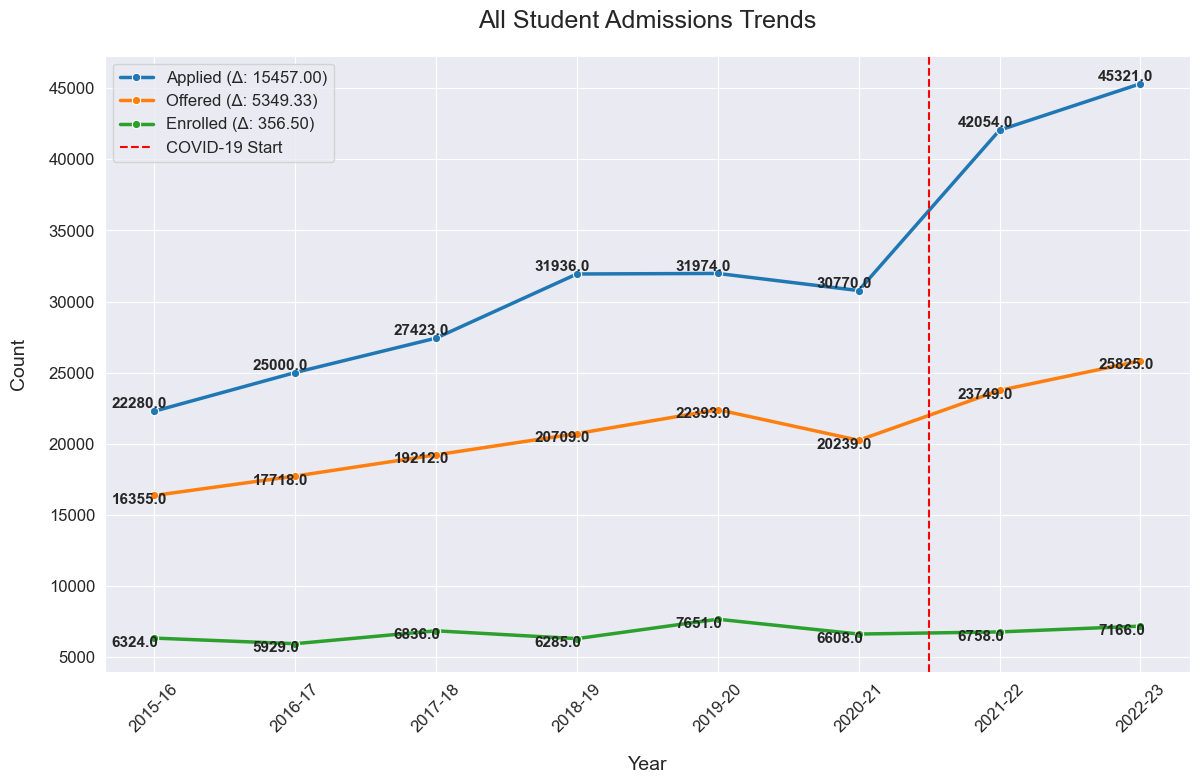

In [16]:
def plot_admissions_trends(csv_file, category='All'):
    # Read the CSV file
    df = pd.read_csv(os.path.join('data/admissions', csv_file))
    
    # Transpose the dataframe and set column names
    df = df.T
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Year'}, inplace=True)
    
    # Calculate average differences before and after COVID
    pre_covid = df[df['Year'] <= '2020-21']
    post_covid = df[df['Year'] >= '2021-22']
    
    pre_covid_avg = pre_covid[['Applied', 'Offered', 'Enrolled']].mean()
    post_covid_avg = post_covid[['Applied', 'Offered', 'Enrolled']].mean()
    avg_difference = post_covid_avg - pre_covid_avg

    # Calculate offered rates for pre and post COVID
    pre_covid_offered_rate = (pre_covid['Offered'].astype(float) / pre_covid['Applied'].astype(float)).mean()
    post_covid_offered_rate = (post_covid['Offered'].astype(float) / post_covid['Applied'].astype(float)).mean()

    # Plot the trends
    plt.figure(figsize=(14, 8))

    # Customize Seaborn style
    sns.set_style('darkgrid')
    sns.set_palette('tab10')

    # Line plots
    applied_plot = sns.lineplot(x='Year', y='Applied', data=df, label='Applied', marker='o', linewidth=2.5)
    offered_plot = sns.lineplot(x='Year', y='Offered', data=df, label='Offered', marker='o', linewidth=2.5)
    enrolled_plot = sns.lineplot(x='Year', y='Enrolled', data=df, label='Enrolled', marker='o', linewidth=2.5)

    # COVID vertical line (halfway between 2020-21 and 2021-22)
    covid_start_index = df[df['Year'] == '2020-21'].index[0] + 0.5
    plt.axvline(x=covid_start_index, color='red', linestyle='--', label='COVID-19 Start')
    
    # Add coordinate values
    for index, row in df.iterrows():
        plt.text(index - 0.3, row['Applied'] + 200, row['Applied'], fontsize=11, fontweight='bold')
        plt.text(index - 0.3, row['Offered'] - 600, row['Offered'], fontsize=11, fontweight='bold')
        plt.text(index - 0.3, row['Enrolled'] - 600, row['Enrolled'], fontsize=11, fontweight='bold')

    # Customize plot
    plt.xlabel('Year', fontsize=14, labelpad=15)
    plt.ylabel('Count', fontsize=14, labelpad=15)
    plt.title(f'{category} Student Admissions Trends', fontsize=18, pad=20)
    plt.xticks(df.index, df['Year'], rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    print(f"\n{category} - Pre COVID Offered Rate: {pre_covid_offered_rate:.2%}")
    print(f"{category} - Post COVID Offered Rate: {post_covid_offered_rate:.2%}")

    # Add average differences and offered rates to the legend
    legend_labels = [
        f"Applied (Δ: {avg_difference['Applied']:.2f})",
        f"Offered (Δ: {avg_difference['Offered']:.2f})",
        f"Enrolled (Δ: {avg_difference['Enrolled']:.2f})",
        'COVID-19 Start'
    ]

    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=legend_labels, fontsize=12)

    plt.show()

# Call the function with the example CSV file
plot_admissions_trends('student.csv', category='All')

## Analysis of Overall Student Admissions Trends

The plot above visualizes the admissions trends at Virginia Tech for all students across the years 2015 to 2023, focusing on three key metrics: applications submitted ("Applied"), offers extended ("Offered"), and students who enrolled ("Enrolled"). 

### Key Insights:

1. **Pre-COVID vs Post-COVID Trends:**
   - **Pre-COVID:** The offered rate before COVID-19 averaged around 69.17%. We observe a steady increase in both applications and offers from 2015-16 to 2019-20, with a minor dip in the 2020-21 year as the pandemic began to influence admissions.
   - **Post-COVID:** Post-COVID, the offered rate dropped to 56.73%, showing a noticeable decline in the institution's selectivity during the pandemic. However, there was a significant rebound in both the number of applications and offers in the 2021-22 and 2022-23 periods, indicating a return to normalcy or potentially even greater competition among applicants.

2. **Applications, Offers, and Enrollments:**
   - **Applications:** After a dip during the onset of COVID in 2020-21, there is a sharp recovery in 2021-22 and 2022-23, with the number of applications rising from 30,770 in 2020-21 to 45,321 in 2022-23. This suggests a surge in interest post-COVID.
   - **Offers:** Similarly, offers initially decreased in 2020-21 but then climbed again, reaching a peak of 25,825 in 2022-23.
   - **Enrollments:** Enrollment figures remained relatively stable across the period, with only minor fluctuations, suggesting that while applications and offers varied, the number of students ultimately enrolling did not change drastically.

The impact of the pandemic on admissions is clear, especially in the drop in offered rates. However, the data suggests a recovery in the university’s ability to offer places to students after the initial pandemic shock.

### Transition to the Next Section (Male vs Female Admissions):
Now that we have a comprehensive view of the overall student trends, it’s important to dive deeper into specific demographics to understand how these patterns might differ. The next section will analyze the admissions trends for male and female students, shedding light on any potential disparities or unique impacts of the pandemic on these groups.



Male - Pre COVID Offered Rate: 65.88%
Male - Post COVID Offered Rate: 52.91%

Female - Pre COVID Offered Rate: 73.86%
Female - Post COVID Offered Rate: 61.87%


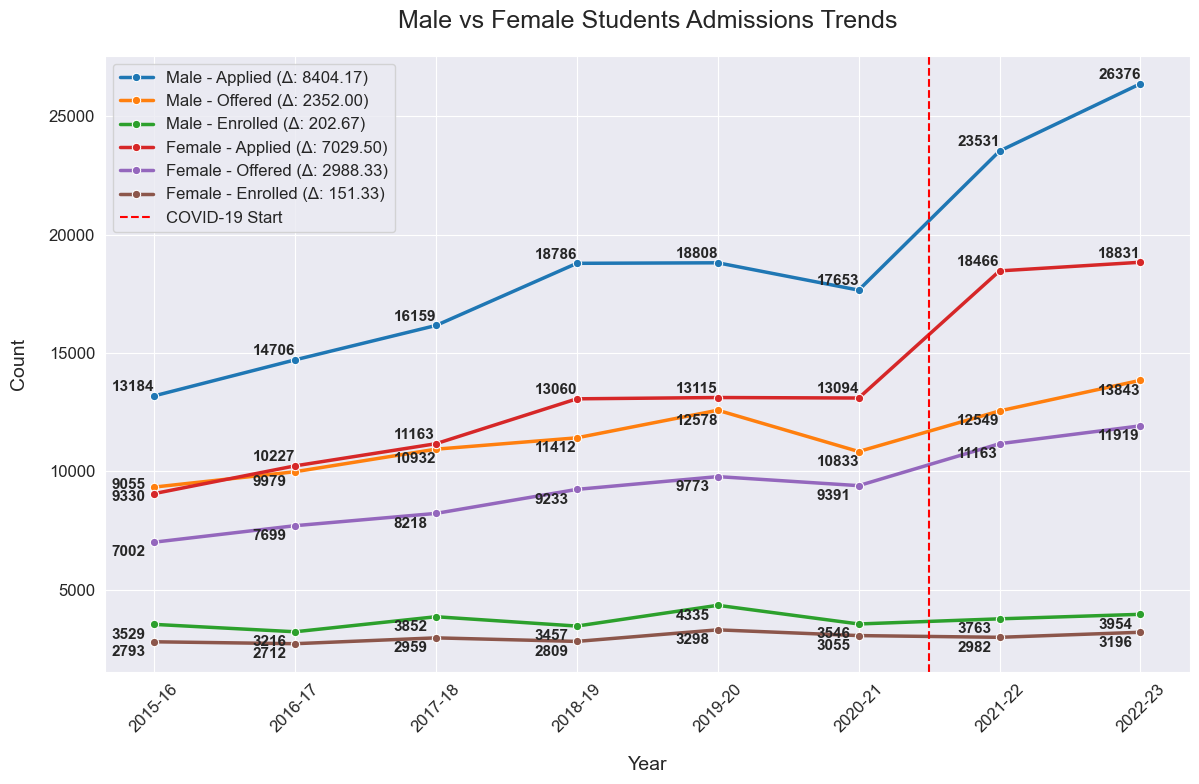

In [17]:
def plot_multiple_admissions_trends(csv_files, categories, title='Student Admissions Trends'):
    plt.figure(figsize=(14, 8))
    
    # Customize Seaborn style
    sns.set_style('darkgrid')
    sns.set_palette('tab10')

    legend_labels = []
    handles = []

    for csv_file, category in zip(csv_files, categories):
        # Read the CSV file
        df = pd.read_csv(os.path.join('data/admissions', csv_file))
        
        # Transpose the dataframe and set column names
        df = df.T
        df.columns = df.iloc[0]
        df = df.iloc[1:]
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'Year'}, inplace=True)
        
        # Calculate average differences before and after COVID
        pre_covid = df[df['Year'] <= '2020-21']
        post_covid = df[df['Year'] >= '2021-22']
        
        pre_covid_avg = pre_covid[['Applied', 'Offered', 'Enrolled']].mean()
        post_covid_avg = post_covid[['Applied', 'Offered', 'Enrolled']].mean()
        avg_difference = post_covid_avg - pre_covid_avg
        
        # Calculate offered rate for pre and post COVID
        pre_covid_offered_rate = (pre_covid['Offered'] / pre_covid['Applied']).mean() * 100
        post_covid_offered_rate = (post_covid['Offered'] / post_covid['Applied']).mean() * 100

        # Line plots with coordinate values
        for col in ['Applied', 'Offered', 'Enrolled']:
            plot = sns.lineplot(x='Year', y=col, data=df, marker='o', linewidth=2.5)
            handles.append(plot.lines[-1])
            legend_labels.append(f"{category} - {col} (Δ: {avg_difference[col]:.2f})")
            
            for index, row in df.iterrows():
                value = row[col]
                y_offset = 200 if col == 'Applied' else -600
                plt.text(index - 0.3, value + y_offset, int(value), fontsize=11, fontweight='bold')
    
        # Add offered rate for pre and post COVID to the legend
        print(f"\n{category} - Pre COVID Offered Rate: {pre_covid_offered_rate:.2f}%")
        print(f"{category} - Post COVID Offered Rate: {post_covid_offered_rate:.2f}%")
    
    # COVID vertical line (halfway between 2020-21 and 2021-22)
    covid_start_index = df[df['Year'] == '2020-21'].index[0] + 0.5
    plt.axvline(x=covid_start_index, color='red', linestyle='--', label='COVID-19 Start')
    handles.append(plt.gca().lines[-1])
    legend_labels.append('COVID-19 Start')
    
    # Customize plot
    plt.xlabel('Year', fontsize=14, labelpad=15)
    plt.ylabel('Count', fontsize=14, labelpad=15)
    plt.title(title, fontsize=18, pad=20)
    plt.xticks(df.index, df['Year'], rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Add average differences to the legend
    plt.legend(handles=handles, labels=legend_labels, fontsize=12)

    plt.show()

# Updated CSV file paths and categories
csv_files = ['male.csv', 'female.csv']
categories = ['Male', 'Female']
title = 'Male vs Female Students Admissions Trends'
plot_multiple_admissions_trends(csv_files, categories, title)

## Analysis of Male vs Female Admissions Trends

The chart above compares the trends in applications, offers, and enrollments for male and female students from 2015 to 2023.

### Key Insights:

1. **Pre-COVID vs Post-COVID Trends:**
   - **Males:** The pre-COVID offered rate for male students averaged 65.88%, but it dropped significantly to 52.91% after the pandemic. This indicates a reduction in the number of male students being offered admission during the post-pandemic period.
   - **Females:** Female students had a higher pre-COVID offered rate at 73.86%, which decreased to 61.87% post-COVID. While female students also experienced a decline in offered rates, their post-pandemic offered rate remains higher than that of male students.

2. **Applications and Offers:**
   - **Male Applicants:** There was consistent growth in male applications before COVID, peaking at 18,808 in 2019-20. After a slight dip in 2020-21, the numbers recovered strongly, reaching 26,376 in 2022-23.
   - **Female Applicants:** Female applications follow a similar trend, peaking at 13,115 in 2019-20, with a rebound to 18,831 in 2022-23 after the initial pandemic decline.
   - **Offers:** The trends for offers follow the application numbers, with female students seeing slightly better post-COVID recovery in offered rates compared to male students.

3. **Enrollment Stability:**
   - Enrollment figures for both male and female students have remained relatively stable despite fluctuations in applications and offers. Male enrollments ranged between 3,500 and 4,000, while female enrollments hovered around 2,500 to 3,500, with slight variations across the years.

### Transition to the Next Section (First Gen vs Non First Gen Admissions):
Now that we have examined gender-based differences in admissions trends, it is essential to explore how first-generation students compare to their non-first-generation peers. The next section will provide insights into the impact of the pandemic on these groups, shedding light on any unique challenges or advantages faced by first-gen students in the admissions process.


First Gen - Pre COVID Offered Rate: 61.04%
First Gen - Post COVID Offered Rate: 59.89%

Non First Gen - Pre COVID Offered Rate: 70.65%
Non First Gen - Post COVID Offered Rate: 56.09%


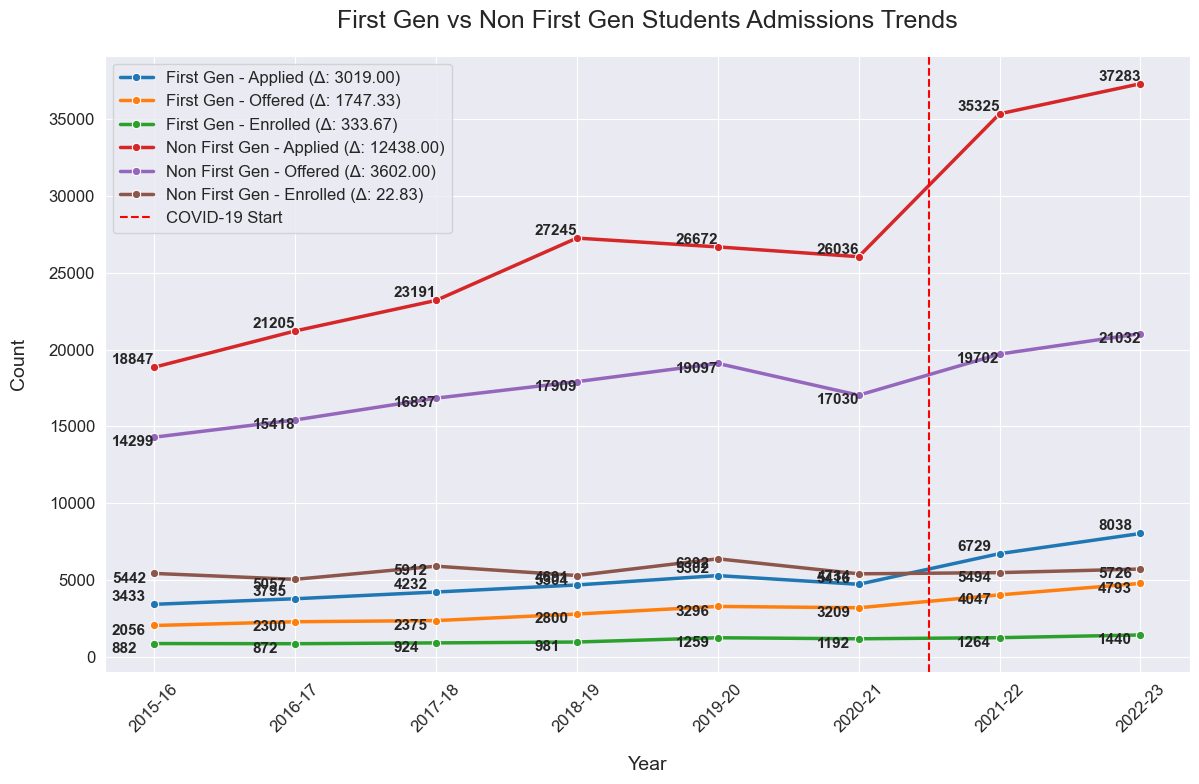

In [18]:
csv_files = ['first_gen.csv', 'non_first_gen.csv']
categories = ['First Gen', 'Non First Gen']
title = 'First Gen vs Non First Gen Students Admissions Trends'
plot_multiple_admissions_trends(csv_files, categories, title)

## Analysis of First Gen vs Non First Gen Admissions Trends

The chart above compares the admissions trends between first-generation (First Gen) students and non-first-generation (Non First Gen) students from 2015 to 2023.

### Key Insights:

1. **Pre-COVID vs Post-COVID Trends:**
   - **First Gen:** The pre-COVID offered rate for first-generation students was 61.04%, which saw a slight decline to 59.08% after the pandemic. Despite this drop, the first-generation group has shown resilience in maintaining relatively stable rates of offers and enrollments.
   - **Non First Gen:** Non-first-generation students had a higher pre-COVID offered rate of 70.65%, which dropped more significantly to 56.09% post-COVID. This suggests that the pandemic had a more pronounced effect on offers for non-first-generation students compared to their first-gen peers.

2. **Applications and Offers:**
   - **First Gen:** First-generation student applications grew steadily from 14,299 in 2015-16 to 21,032 in 2022-23, reflecting a positive trend in access to higher education for this group. The number of offers also followed a similar upward trajectory.
   - **Non First Gen:** Non-first-generation student applications showed even more significant growth, jumping from 18,847 in 2015-16 to a substantial 37,283 in 2022-23. However, the number of offers did not increase as dramatically, especially in the post-COVID period, signaling a more competitive environment.

3. **Enrollment Stability:**
   - Enrollment for both groups has remained relatively consistent across the years, with minor fluctuations. First-generation enrollments ranged between 800 and 1,400 students, while non-first-generation enrollments remained between 4,000 and 6,000 students, reflecting the larger applicant pool for non-first-gen students.

### Transition to the Next Section (In State vs Out of State Admissions):
Next, we will explore how the pandemic has impacted in-state versus out-of-state admissions. This will help us understand whether geographic factors played a role in shifting admissions dynamics and how these trends compare with those observed for first-generation and non-first-generation students.


In State - Pre COVID Offered Rate: 64.58%
In State - Post COVID Offered Rate: 46.74%

Out Of State - Pre COVID Offered Rate: 74.11%
Out Of State - Post COVID Offered Rate: 64.56%


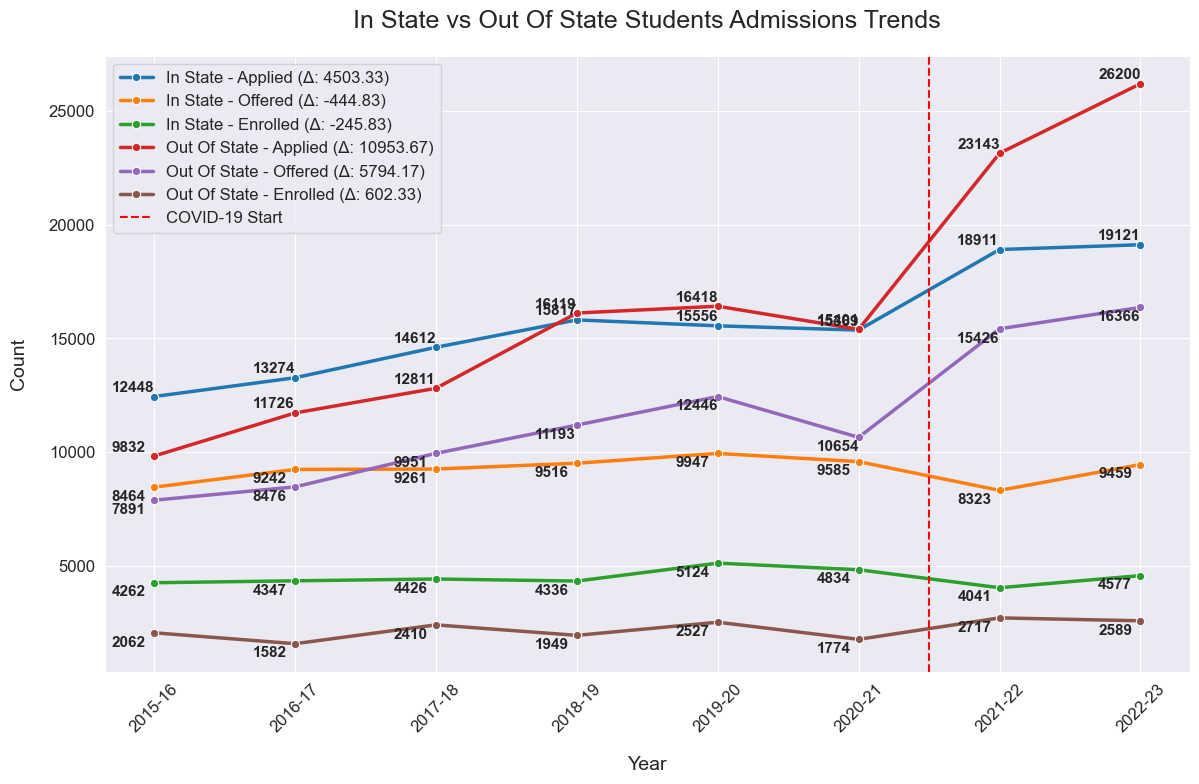

In [19]:
csv_files = ['in_state.csv', 'out_of_state.csv']
categories = ['In State', 'Out Of State']
title = 'In State vs Out Of State Students Admissions Trends'
plot_multiple_admissions_trends(csv_files, categories, title)

## Analysis of In State vs Out of State Admissions Trends

The chart above highlights the admissions trends between in-state and out-of-state students at Virginia Tech from 2015 to 2023.

### Key Insights:

1. **Pre-COVID vs Post-COVID Trends:**
   - **In State:** The pre-COVID offered rate for in-state students was 64.58%, which dropped significantly to 46.74% after the pandemic. This steep decline suggests that in-state students faced more challenges in receiving offers after COVID-19, possibly due to increased competition or changes in university admission policies.
   - **Out Of State:** Out-of-state students had a higher pre-COVID offered rate of 74.11%, which also declined to 64.56% post-COVID. Despite the drop, out-of-state students continued to fare better in terms of offers than in-state students in the post-pandemic period.

2. **Applications and Offers:**
   - **In State:** Applications from in-state students grew from 12,448 in 2015-16 to 19,121 in 2022-23. However, the number of offers has seen a decrease, dropping by approximately 445 offers, indicating a more competitive environment for in-state applicants post-pandemic.
   - **Out Of State:** Out-of-state student applications skyrocketed, growing from 15,556 in 2018-19 to 26,200 in 2022-23. The number of offers for out-of-state students followed a similar upward trajectory, with a gain of 5,794 offers in the post-pandemic period. This suggests that out-of-state students became a more significant focus for admissions during and after the pandemic.

3. **Enrollment Trends:**
   - **In State Enrollment:** The enrollment of in-state students remained relatively stable, with a slight decrease in numbers. The post-pandemic recovery was modest, with enrollments hovering around 4,000 to 4,500 students.
   - **Out Of State Enrollment:** Out-of-state student enrollment has grown consistently, with a noticeable increase in the post-pandemic period, reaching approximately 2,589 students in 2022-23.

### Transition to the Next Section (International vs National Admissions):
Next, we will analyze how international and national admissions trends evolved over the same period. This will provide insights into the challenges faced by international students during the pandemic and how their application patterns compare to national students. With global mobility and travel restrictions playing a significant role during COVID-19, this analysis will help us understand the broader impact of the pandemic on international admissions.


International - Pre COVID Offered Rate: 68.25%
International - Post COVID Offered Rate: 34.36%

Non International - Pre COVID Offered Rate: 69.26%
Non International - Post COVID Offered Rate: 58.27%


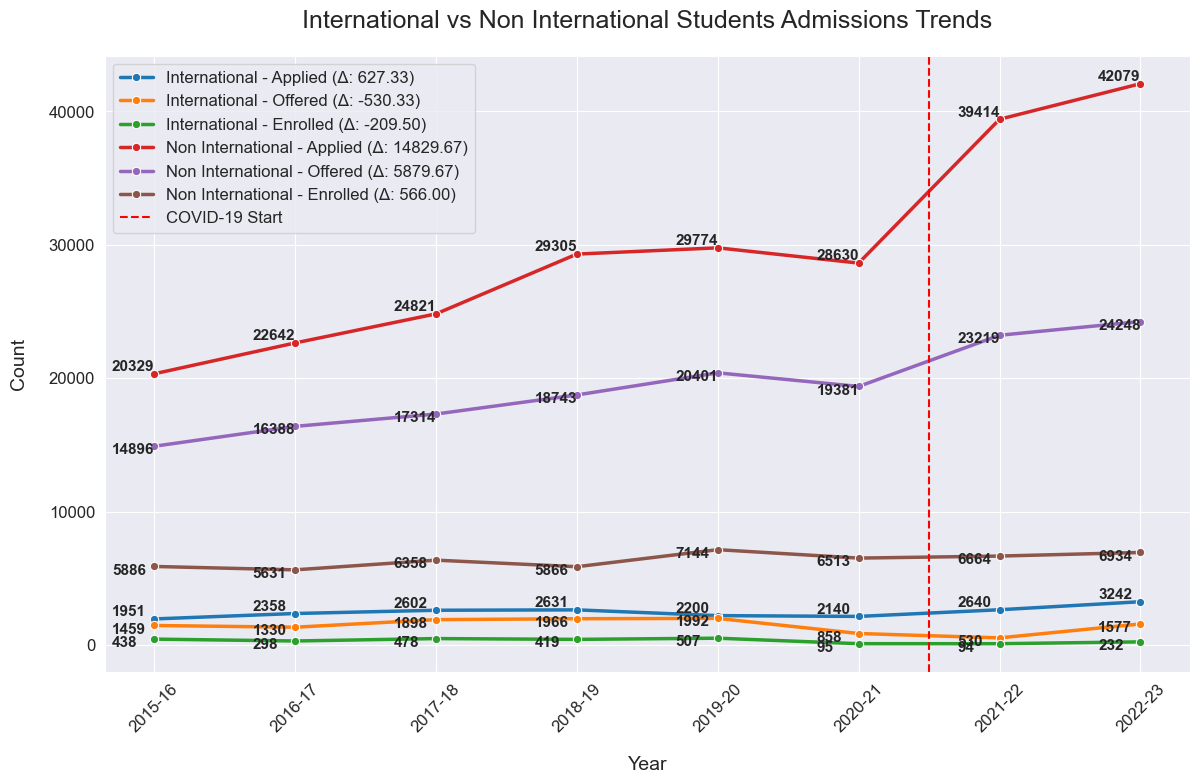

In [20]:
csv_files = ['international.csv', 'national.csv']
categories = ['International', 'Non International']
title = 'International vs Non International Students Admissions Trends'
plot_multiple_admissions_trends(csv_files, categories, title)

## Analysis of International vs Non-International Admissions Trends

The chart above compares the admissions trends between international and non-international (domestic) students from 2015 to 2023.

### Key Insights:

1. **Pre-COVID vs Post-COVID Trends:**
   - **International Students:** The offered rate for international students before COVID-19 was 68.25%, but this dropped dramatically to 34.36% post-pandemic. This sharp decline indicates that international students faced significant challenges in receiving offers during the pandemic, likely due to global travel restrictions and uncertainties surrounding visa policies.
   - **Non-International Students:** Non-international (domestic) students had a pre-COVID offered rate of 69.26%, which also dropped but less drastically, to 58.27% post-pandemic. The decline in offers to domestic students was significant but not as steep as for international students, reflecting a comparatively more stable admissions environment for non-international applicants.

2. **Applications and Offers:**
   - **International Students:** The number of international applications remained relatively stable across the years, but the number of offers decreased notably post-COVID, reflecting the university's reduced focus on or capacity to admit international students during this period.
   - **Non-International Students:** Applications from non-international students saw a sharp increase post-pandemic, reaching 42,079 in 2022-23, with offers following a similar upward trajectory. This growth suggests that Virginia Tech placed more emphasis on domestic admissions to compensate for the challenges in international recruitment during the pandemic.

3. **Enrollment Trends:**
   - **International Enrollment:** International enrollment saw a marked decline during and after the pandemic, with numbers dropping from 1,997 in 2019-20 to 858 in 2020-21, indicating the difficulties faced by international students in enrolling due to travel and visa restrictions. However, there was a small recovery by 2022-23.
   - **Non-International Enrollment:** Domestic enrollment remained steady, with a slight increase post-pandemic, reflecting the university's ability to maintain strong domestic enrollment even amidst the challenges posed by COVID-19.

### Transition to the Next Section (Race-Based Admissions Trends):
The next section will explore race-based admissions trends, examining how different racial and ethnic groups were affected by the pandemic and how their application, offer, and enrollment rates have changed over time. This analysis will provide deeper insights into any disparities or improvements in diversity within the admissions process.


White - Pre COVID Offered Rate: 71.73%
White - Post COVID Offered Rate: 57.43%


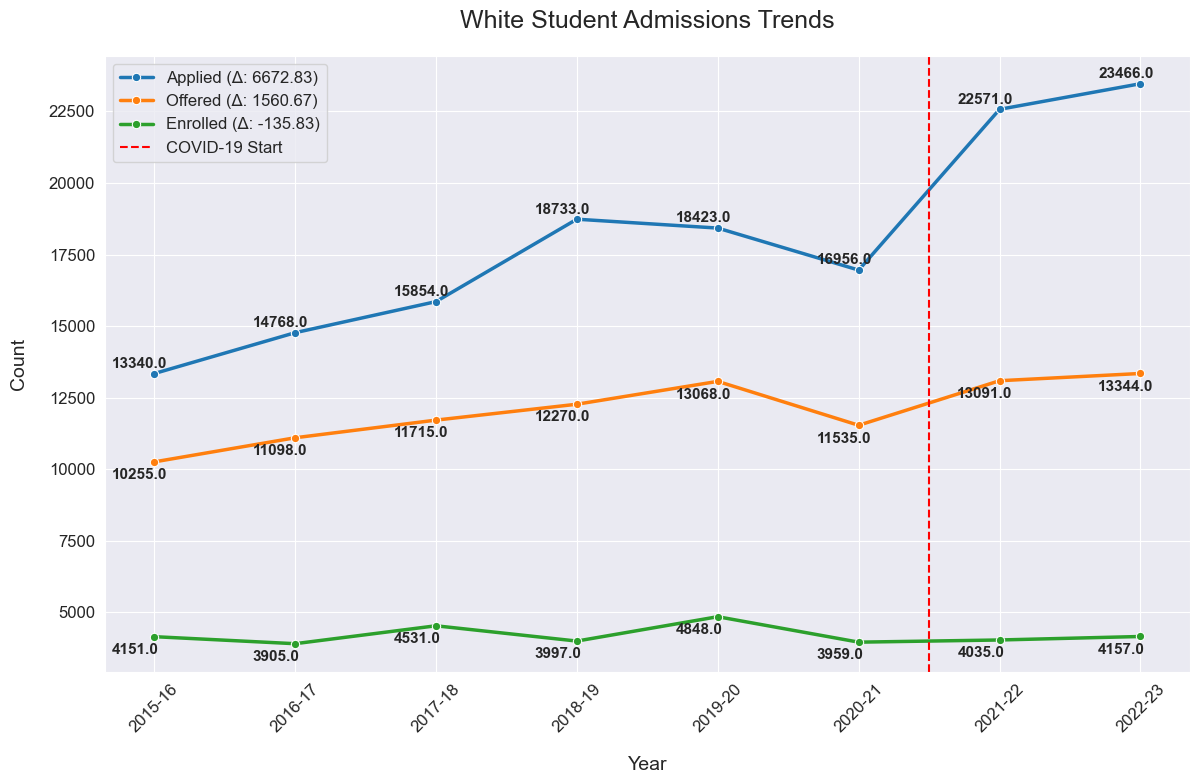


Black - Pre COVID Offered Rate: 56.71%
Black - Post COVID Offered Rate: 58.32%


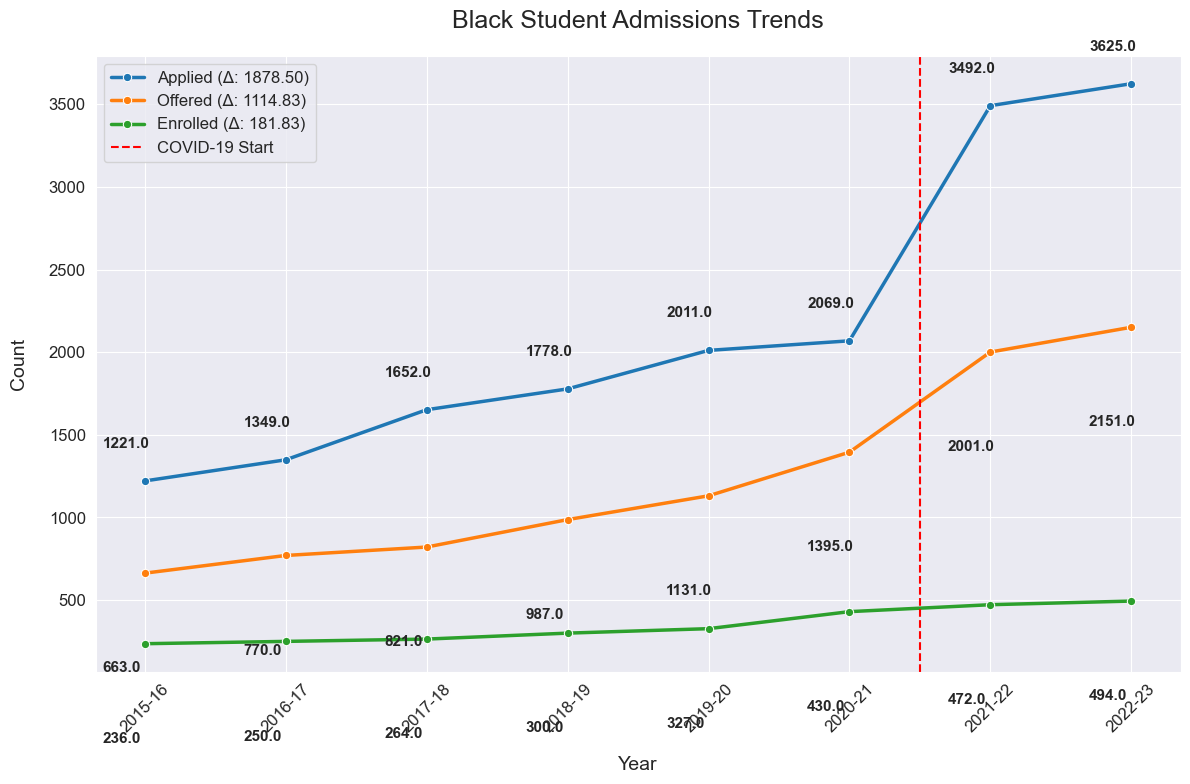


Hispanic - Pre COVID Offered Rate: 66.31%
Hispanic - Post COVID Offered Rate: 68.49%


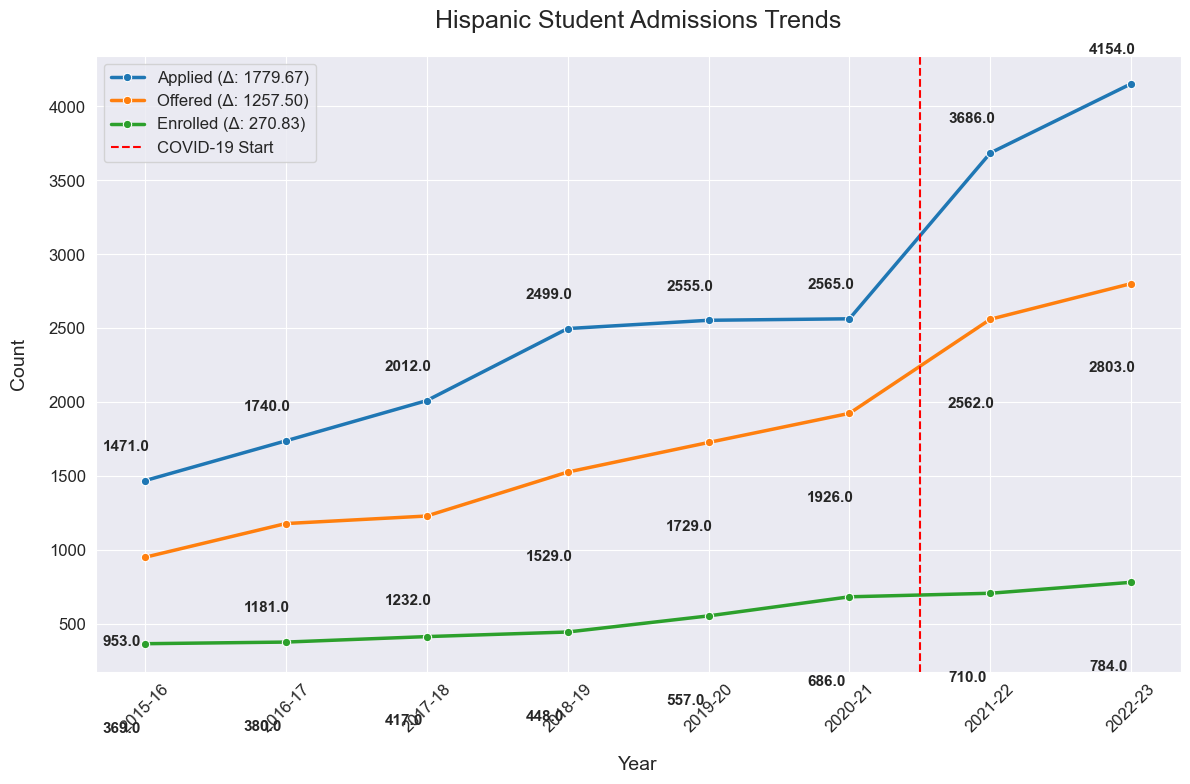


Asian - Pre COVID Offered Rate: 67.02%
Asian - Post COVID Offered Rate: 55.30%


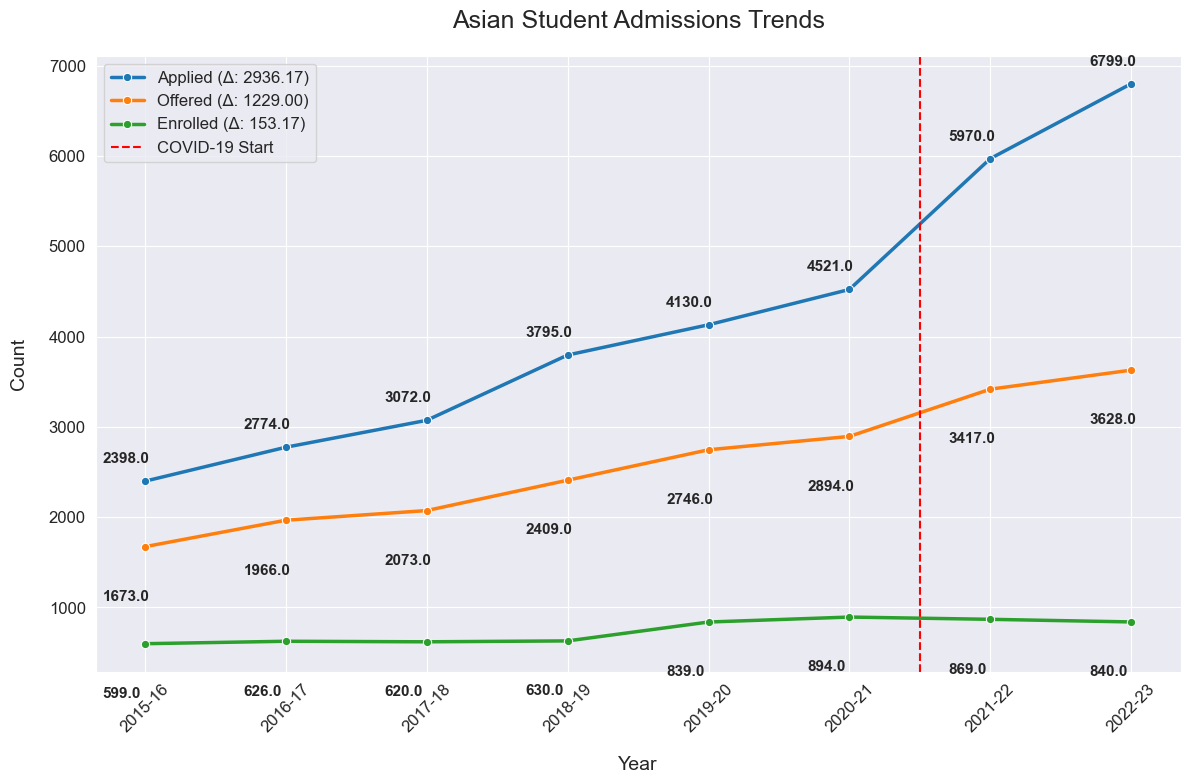

In [21]:
plot_admissions_trends('white.csv', category='White')
plot_admissions_trends('black.csv', category='Black')
plot_admissions_trends('hispanic.csv', category='Hispanic')
plot_admissions_trends('asian.csv', category='Asian')

## Analysis of Race-Based Admissions Trends

The following charts compare the admissions trends for White, Black, Hispanic, and Asian students at Virginia Tech from 2015 to 2023.

### White Student Admissions Trends:
- **Pre-COVID vs Post-COVID Trends:** The pre-COVID offered rate for White students was 71.73%, but this dropped to 57.43% post-COVID. This significant decline indicates increased competition or changes in admissions policies affecting this group.
- **Applications and Offers:** Applications for White students increased notably post-pandemic, with a surge from 16,956 in 2020-21 to 22,571 in 2021-22. Offers, however, have remained relatively stable, indicating that while more students applied, the university maintained selectivity.
- **Enrollment Stability:** Enrollment for White students has remained relatively consistent, hovering around 4,000 students across the years.

### Black Student Admissions Trends:
- **Pre-COVID vs Post-COVID Trends:** Interestingly, Black students saw an increase in their offered rate post-COVID, rising from 56.71% to 58.32%. This suggests that the university may have adjusted its efforts to increase diversity post-pandemic.
- **Applications and Offers:** Applications and offers for Black students have grown steadily, particularly post-pandemic, with a jump in applications from 2,069 in 2020-21 to 3,625 in 2022-23. Offers followed a similar trend, reflecting positive changes in access for Black students.
- **Enrollment Trends:** Enrollment for Black students has shown steady growth, increasing from 430 in 2020-21 to 494 in 2022-23.

### Hispanic Student Admissions Trends:
- **Pre-COVID vs Post-COVID Trends:** The offered rate for Hispanic students also improved post-pandemic, rising from 66.31% to 68.49%. This indicates a slight positive shift in admissions opportunities for this group.
- **Applications and Offers:** Applications increased significantly from 2,565 in 2020-21 to 4,154 in 2022-23, with offers showing a similar increase. This trend reflects increased outreach or interest in the Hispanic student population.
- **Enrollment Trends:** Enrollment for Hispanic students increased steadily, from 710 in 2021-22 to 784 in 2022-23, reflecting a positive trend in overall admissions.

### Asian Student Admissions Trends:
- **Pre-COVID vs Post-COVID Trends:** The offered rate for Asian students saw a decline, dropping from 67.02% pre-COVID to 55.30% post-COVID. This suggests a heightened level of competition or selectivity for this group.
- **Applications and Offers:** Asian student applications surged post-pandemic, from 4,521 in 2020-21 to 6,799 in 2022-23. However, offers did not increase proportionally, indicating increased selectivity.
- **Enrollment Trends:** Enrollment numbers have remained stable, with only slight variations, showing that the number of Asian students enrolling in the university has been consistent despite fluctuations in offers.

### Overall (Race-Based):
The race-based admissions trends show varying impacts of the COVID-19 pandemic across different racial groups. While White and Asian students experienced declines in offered rates post-pandemic, Black and Hispanic students saw improvements in their offered rates. This analysis suggests that Virginia Tech may have adjusted its admissions strategies to focus on diversity and inclusivity in the post-pandemic period, with significant growth in applications and offers for Black and Hispanic students.

## Conclusion

The analysis of Virginia Tech's high school admissions trends reveals the substantial impact that the COVID-19 pandemic had on the university's admissions process, with significant variations across different demographic groups. 

### Key Findings:
1. **Pre-COVID vs Post-COVID Trends:** Across all categories—whether based on gender, geographic location, first-generation status, or race—the pandemic led to notable changes in application, offer, and enrollment rates. Most groups experienced declines in offered rates post-pandemic, reflecting increased competition, changing admissions policies, or adjustments made by students and universities in response to the unique challenges of the time.
   
2. **Recovery and Growth:** Despite the initial disruptions caused by the pandemic, many groups saw a strong recovery in application numbers, particularly out-of-state, international, and racial minority groups. This suggests that Virginia Tech adapted its admissions strategy to better accommodate or attract a broader and more diverse pool of applicants in the post-pandemic period.

3. **Diversity Trends:** Notably, while White and Asian students saw declines in their offered rates post-pandemic, Black and Hispanic students experienced improvements, indicating a shift in focus towards increasing diversity. The growth in applications and offers to these underrepresented groups suggests a positive trend towards inclusivity in Virginia Tech's admissions practices.

4. **Geographic Variations:** Out-of-state students saw a more significant recovery in offers and applications compared to in-state students. This could reflect a strategic shift by the university to attract more out-of-state and international students to diversify its student body and mitigate the impact of lower in-state applications.